<a href="https://colab.research.google.com/github/fazalpge/ML_model_development/blob/main/Attrition_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sklearn

In [ ]:
print(sklearn.__version__)

1.2.2


In [ ]:
import numpy as np

In [ ]:
print(np.__version__)

1.23.5


In [ ]:
print(pd.__version__)

1.5.3


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/fazalpge/AI-based-Smart-ERP-Next/main/employee.csv')

In [ ]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

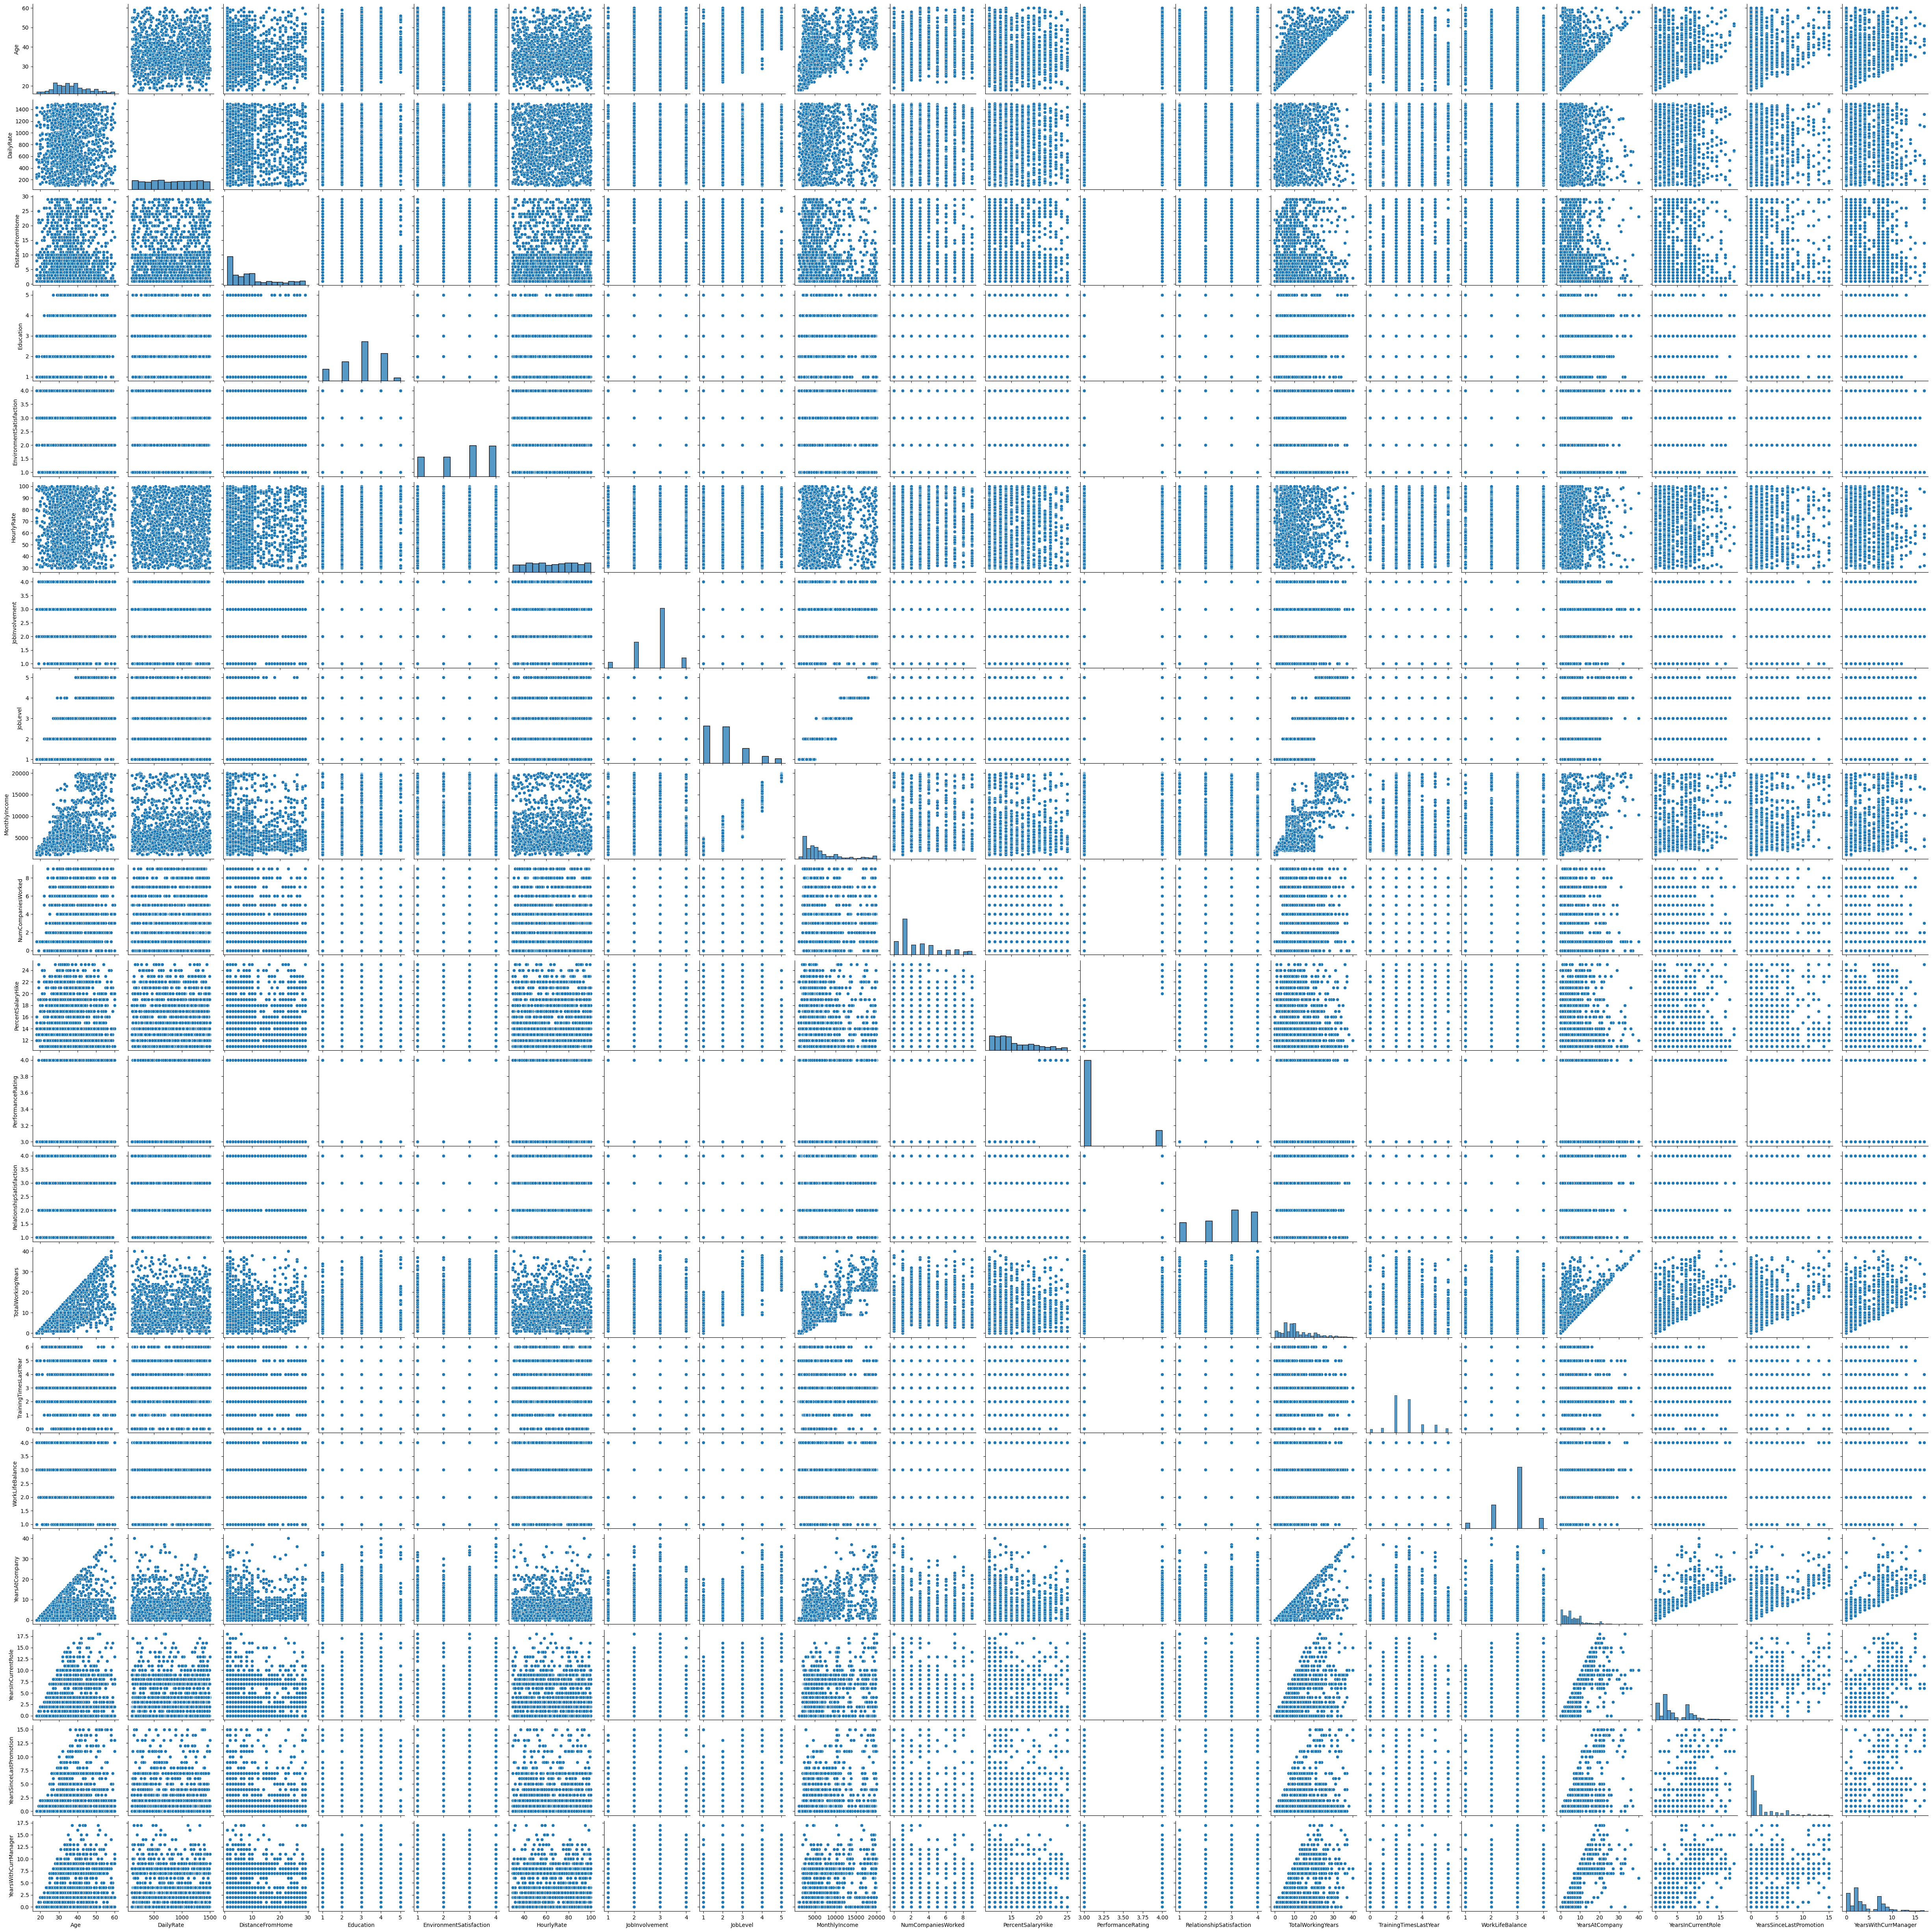

In [ ]:
columns_of_interest = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
                        'HourlyRate', 'JobInvolvement', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
                        'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.pairplot(df[columns_of_interest])
plt.show()

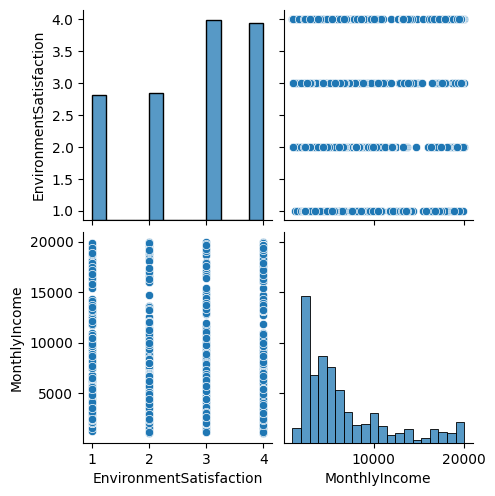

In [ ]:
columns_of_interest = [ 'EnvironmentSatisfaction',
                         'MonthlyIncome',  'Attrition']
sns.pairplot(df[columns_of_interest])
plt.show()

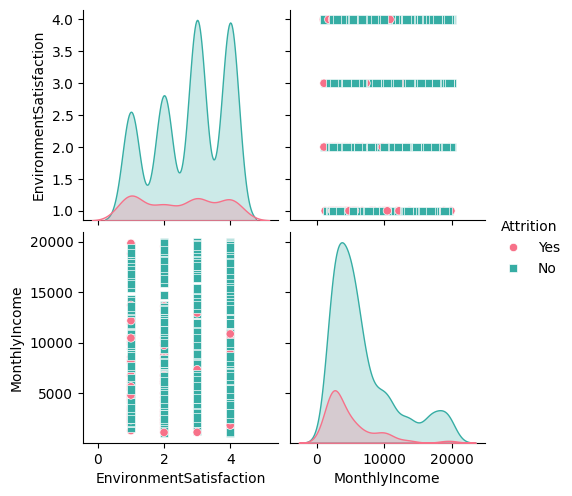

In [ ]:
sns.pairplot(df[columns_of_interest], hue='Attrition', markers=['o', 's'], palette='husl')

# Let's Plan

In [ ]:
df.drop(columns=['EmployeeCount','StandardHours','Over18'],inplace=True)

In [ ]:
data=df.copy()
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeNumber  \
0                    1          2  Life Sciences               1   
1                    8          1  Life Sciences               2   
2                    2          2          Other               4   
3                    3          4  Life Sciences               5   
4                    2          1        Medical               7   
...                ...        ...            ...             ...   
1465                23          2        Medical            2061   
1466                 6          1        Medical            2062   
1467                 4          3  Life Sciences            2064   
1468                 2          3        Medical            2065   
1469                 8          3        Medical            2068   

      EnvironmentSatisfaction  ... PerformanceRating  \
0                           2  ...                 3   
1                           3  ...                 4   
2                           4  ...                 3   
3                           4  ...                 3   
4                           1  ...                 3   
...                       ...  ...               ...   
1465                        3  ...                 3   
1466                        4  ...                 3   
1467                        2  ...                 4   
1468                        4  ...                 3   
1469                        2  ...                 3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
1465                         3                 1                 17   
1466                         1                 1                  9   
1467                         2                 1                  6   
1468                         4                 0                 17   
1469                         1                 0                  6   

     TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  \
0                        0                1              6   
1                        3                3             10   
2                        3                3              0   
3                        3                3              8   
4                        3                3              2   
...                    ...              ...            ...   
1465                     3                3              5   
1466                     5                3              7   
1467                     0                3              6   
1468                     3                2              9   
1469                     3                4             

In [ ]:
X = data.drop("Attrition", axis=1)
Y = data["Attrition"].map({'Yes': 1, 'No': 0})

In [ ]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [ ]:
# Step 1 -> train/test/split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [ ]:
X_train.head()

Age BusinessTravel  DailyRate              Department  DistanceFromHome  \
1097   24  Travel_Rarely        350  Research & Development                21   
727    18     Non-Travel        287  Research & Development                 5   
254    29  Travel_Rarely       1247                   Sales                20   
1175   39  Travel_Rarely        492  Research & Development                12   
1341   31  Travel_Rarely        311  Research & Development                20   

      Education    EducationField  EmployeeNumber  EnvironmentSatisfaction  \
1097          2  Technical Degree            1551                        3   
727           2     Life Sciences            1012                        2   
254           2         Marketing             349                        4   
1175          3           Medical            1654                        4   
1341          3     Life Sciences            1881                        2   

     Gender  ...  PerformanceRating  RelationshipSatisfaction  \
1097   Male  ...                  3                         2   
727    Male  ...                  3                         4   
254    Male  ...                  3                         4   
1175   Male  ...                  4                         3   
1341   Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
1097                 3                 2                      3   
727                  0                 0                      2   
254                  1                10                      2   
1175                 0                 7                      3   
1341                 1                10                      2   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1097               3               1                   1   
727                3               0                   0   
254                3               3                   2   
1175               3               5                   4   
1341               3              10                   8   

      YearsSinceLastPromotion YearsWithCurrManager  
1097                        0                    0  
727                         0                    0  
254                         0                    2  
1175                        1                    0  
1341                        0                    2  

[5 rows x 31 columns]

In [ ]:
y_train.sample(5)

556     0
657     0
224     0
1150    0
821     0
Name: Attrition, dtype: int64

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 1097 to 1126
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeNumber            1176 non-null   int64 
 8   EnvironmentSatisfaction   1176 non-null   int64 
 9   Gender                    1176 non-null   object
 10  HourlyRate                1176 non-null   int64 
 11  JobInvolvement            1176 non-null   int64 
 12  JobLevel                  1176 non-null   int64 
 13  JobRole                   1176 non-null   object
 14  JobSatisfaction      

In [ ]:
# Handaling Missing Value
# imputation transformer
trf0 = ColumnTransformer([
    ('SI',SimpleImputer(),slice(None))
],remainder='passthrough')

In [ ]:
# one hot encoding
trf1 = ColumnTransformer([
    ('ohe',OneHotEncoder(sparse=False,drop="first", handle_unknown='ignore'),[1,3,6,9,13,15,19])
],remainder='passthrough')

In [ ]:
# Scaling
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,45))
])


In [ ]:
dftrf1_X_train=pd.DataFrame(trf1.fit_transform(X_train))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
dftrf1_X_train

0    1    2    3    4    5    6    7    8    9   ...   35   36   37  \
0     0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  3.0  2.0  3.0   
1     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  4.0  0.0   
2     0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  3.0  4.0  1.0   
3     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  4.0  3.0  0.0   
4     0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  1.0  1.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1171  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  4.0  2.0   
1172  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  1.0  0.0   
1173  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  3.0  2.0  1.0   
1174  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  3.0  1.0  1.0   
1175  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  3.0  3.0  1.0   

        38   39   40    41   42   43   44  
0      2.0  3.0  3.0   1.0  1.0  0.0  0.0  
1      0.0  2.0  3.0   0.0  0.0  0.0  0.0  
2     10.0  2.0  3.0   3.0  2.0  0.0  2.0  
3      7.0  3.0  3.0   5.0  4.0  1.0  0.0  
4     10.0  2.0  3.0  10.0  8.0  0.0  2.0  
...    ...  ...  ...   ...  ...  ...  ...  
1171  10.0  3.0  2.0  10.0  9.0  6.0  8.0  
1172  11.0  3.0  1.0   3.0  2.0  1.0  2.0  
1173   1.0  5.0  3.0   0.0  0.0  0.0  0.0  
1174  10.0  2.0  3.0   4.0  3.0  0.0  3.0  
1175  27.0  2.0  3.0   1.0  0.0  0.0  0.0  

[1176 rows x 45 columns]

In [ ]:
dftrf1=trf1
dftrf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [1, 3, 6, 9, 13, 15, 19])])

In [ ]:
dftrf2_X_test=pd.DataFrame(trf2.fit_transform(dftrf1_X_train))

In [ ]:
dftrf2_X_test

0    1    2    3    4    5    6    7    8    9   ...   35        36  \
0     0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.333333   
1     0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.000000   
2     0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  1.000000   
3     0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  1.0  0.666667   
4     0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.000000   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
1171  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.000000   
1172  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.000000   
1173  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.333333   
1174  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.000000   
1175  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  0.0  0.666667   

            37     38        39        40     41        42        43        44  
0     1.000000  0.050  0.500000  0.666667  0.025  0.055556  0.000000  0.000000  
1     0.000000  0.000  0.333333  0.666667  0.000  0.000000  0.000000  0.000000  
2     0.333333  0.250  0.333333  0.666667  0.075  0.111111  0.000000  0.117647  
3     0.000000  0.175  0.500000  0.666667  0.125  0.222222  0.066667  0.000000  
4     0.333333  0.250  0.333333  0.666667  0.250  0.444444  0.000000  0.117647  
...        ...    ...       ...       ...    ...       ...       ...       ...  
1171  0.666667  0.250  0.500000  0.333333  0.250  0.500000  0.400000  0.470588  
1172  0.000000  0.275  0.500000  0.000000  0.075  0.111111  0.066667  0.117647  
1173  0.333333  0.025  0.833333  0.666667  0.000  0.000000  0.000000  0.000000  
1174  0.333333  0.250  0.333333  0.666667  0.100  0.166667  0.000000  0.176471  
1175  0.333333  0.675  0.333333  0.666667  0.025  0.000000  0.000000  0.000000  

[1176 rows x 45 columns]

In [ ]:
X_train

Age     BusinessTravel  DailyRate              Department  \
1097   24      Travel_Rarely        350  Research & Development   
727    18         Non-Travel        287  Research & Development   
254    29      Travel_Rarely       1247                   Sales   
1175   39      Travel_Rarely        492  Research & Development   
1341   31      Travel_Rarely        311  Research & Development   
...   ...                ...        ...                     ...   
1130   35      Travel_Rarely        750  Research & Development   
1294   41      Travel_Rarely        447  Research & Development   
860    22  Travel_Frequently       1256  Research & Development   
1459   29      Travel_Rarely       1378  Research & Development   
1126   50      Travel_Rarely        264                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeNumber  \
1097                21          2  Technical Degree            1551   
727                  5          2     Life Sciences            1012   
254                 20          2         Marketing             349   
1175                12          3           Medical            1654   
1341                20          3     Life Sciences            1881   
...                ...        ...               ...             ...   
1130                28          3     Life Sciences            1596   
1294                 5          3     Life Sciences            1814   
860                  3          4     Life Sciences            1203   
1459                13          2             Other            2053   
1126                 9          3         Marketing            1591   

      EnvironmentSatisfaction Gender  ...  PerformanceRating  \
1097                        3   Male  ...                  3   
727                         2   Male  ...                  3   
254                         4   Male  ...                  3   
1175                        4   Male  ...                  4   
1341                        2   Male  ...                  3   
...                       ...    ...  ...                ...   
1130                        2   Male  ...                  3   
1294                        2   Male  ...                  3   
860                         3   Male  ...                  3   
1459                        4   Male  ...                  3   
1126                        3   Male  ...                  3   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
1097                         2                 3                 2   
727                          4                 0                 0   
254                          4                 1                10   
1175                         3                 0                 7   
1341                         1                 1                10   
...                        ...               ...               ...   
1130                         4                 2                10   
1294                         1                 0                11   
860                          2                 1                 1   
1459                         1                 1                10   
1126                         3                 1                27   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1097                      3               3               1   
727                       2               3               0   
254                       2               3               3   
1175                      3               3               5   
1341                      2               3              10   
...                     ...             ...             ...   
1130                      3               2              10   
1294                      3               1               3   
860                       5               3               0   
1459                      2               3               4   
1126                      2               3  

In [ ]:
X_train

Age     BusinessTravel  DailyRate              Department  \
1097   24      Travel_Rarely        350  Research & Development   
727    18         Non-Travel        287  Research & Development   
254    29      Travel_Rarely       1247                   Sales   
1175   39      Travel_Rarely        492  Research & Development   
1341   31      Travel_Rarely        311  Research & Development   
...   ...                ...        ...                     ...   
1130   35      Travel_Rarely        750  Research & Development   
1294   41      Travel_Rarely        447  Research & Development   
860    22  Travel_Frequently       1256  Research & Development   
1459   29      Travel_Rarely       1378  Research & Development   
1126   50      Travel_Rarely        264                   Sales   

      DistanceFromHome  Education    EducationField  EmployeeNumber  \
1097                21          2  Technical Degree            1551   
727                  5          2     Life Sciences            1012   
254                 20          2         Marketing             349   
1175                12          3           Medical            1654   
1341                20          3     Life Sciences            1881   
...                ...        ...               ...             ...   
1130                28          3     Life Sciences            1596   
1294                 5          3     Life Sciences            1814   
860                  3          4     Life Sciences            1203   
1459                13          2             Other            2053   
1126                 9          3         Marketing            1591   

      EnvironmentSatisfaction Gender  ...  PerformanceRating  \
1097                        3   Male  ...                  3   
727                         2   Male  ...                  3   
254                         4   Male  ...                  3   
1175                        4   Male  ...                  4   
1341                        2   Male  ...                  3   
...                       ...    ...  ...                ...   
1130                        2   Male  ...                  3   
1294                        2   Male  ...                  3   
860                         3   Male  ...                  3   
1459                        4   Male  ...                  3   
1126                        3   Male  ...                  3   

      RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
1097                         2                 3                 2   
727                          4                 0                 0   
254                          4                 1                10   
1175                         3                 0                 7   
1341                         1                 1                10   
...                        ...               ...               ...   
1130                         4                 2                10   
1294                         1                 0                11   
860                          2                 1                 1   
1459                         1                 1                10   
1126                         3                 1                27   

      TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
1097                      3               3               1   
727                       2               3               0   
254                       2               3               3   
1175                      3               3               5   
1341                      2               3              10   
...                     ...             ...             ...   
1130                      3               2              10   
1294                      3               1               3   
860                       5               3               0   
1459                      2               3               4   
1126                      2               3  

In [ ]:
# train the model-DecisionTree
trf3 = DecisionTreeClassifier()

# Create Pipeline

In [ ]:
attr_pipe = Pipeline([

    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)

])

In [ ]:
# train
attr_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('trf3', DecisionTreeClassifier())])

# Explore the Pipeline

In [ ]:
# Code here
attr_pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe',
                                  OneHotEncoder(drop='first',
                                                handle_unknown='ignore',
                                                sparse=False),
                                  [1, 3, 6, 9, 13, 15, 19])]),
 'trf2': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 45, None))]),
 'trf3': DecisionTreeClassifier()}

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
# Predict
y_pred = attr_pipe.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#DecisionTree
accuracy_score(y_test,y_pred)


0.7891156462585034

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       255
           1       0.22      0.23      0.23        39

    accuracy                           0.79       294
   macro avg       0.55      0.55      0.55       294
weighted avg       0.79      0.79      0.79       294



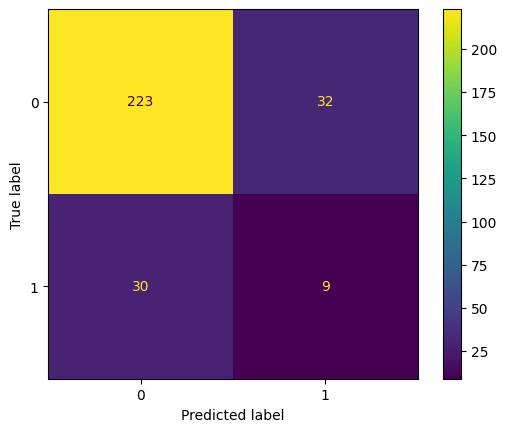

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=attr_pipe.classes_)
disp.plot()
plt.show()


In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[223  32]
 [ 30   9]]


In [ ]:
# train the model-Logistic Regression
clf2 = LogisticRegression ()

In [ ]:
attr_pipe_lr = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf2',clf2)

])

In [ ]:
# train
attr_pipe_lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('clf2', LogisticRegression())])

In [ ]:
# Predict Logistic Regression
y_pred = attr_pipe_lr.predict(X_test)

In [ ]:
# Predict probability
y_pred_proba = attr_pipe_lr.predict_proba(X_test)

In [ ]:
y_pred_proba

array([[9.18971425e-01, 8.10285746e-02],
       [9.95292598e-01, 4.70740180e-03],
       [7.17335636e-01, 2.82664364e-01],
       [9.74565152e-01, 2.54348477e-02],
       [9.24051209e-01, 7.59487906e-02],
       [6.61649513e-01, 3.38350487e-01],
       [6.18316354e-01, 3.81683646e-01],
       [9.55509133e-01, 4.44908665e-02],
       [9.40915645e-01, 5.90843548e-02],
       [9.80358406e-01, 1.96415939e-02],
       [5.15911997e-01, 4.84088003e-01],
       [9.47387632e-01, 5.26123678e-02],
       [8.90744968e-01, 1.09255032e-01],
       [9.25407479e-01, 7.45925213e-02],
       [9.65347105e-01, 3.46528949e-02],
       [8.55444190e-01, 1.44555810e-01],
       [7.40087774e-01, 2.59912226e-01],
       [8.41297472e-01, 1.58702528e-01],
       [8.11798564e-01, 1.88201436e-01],
       [9.51994515e-01, 4.80054855e-02],
       [4.38261836e-01, 5.61738164e-01],
       [9.94639945e-01, 5.36005545e-03],
       [9.51128436e-01, 4.88715639e-02],
       [6.86068252e-01, 3.13931748e-01],
       [8.678461

In [ ]:
probability_of_attrition = attr_pipe_lr.predict_proba(X_test)[0][1]
probability_of_attrition

0.08102857455474345

In [ ]:
#Logistic Regression
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.891156462585034

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       255
           1       0.67      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.79      0.67      0.70       294
weighted avg       0.88      0.89      0.88       294



In [ ]:
# Create a random forest classifier
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
attr_pipe_rf = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf3',clf3)

])

In [ ]:
# train
attr_pipe_rf.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('clf3', RandomForestClassifier(random_state=42))])

In [ ]:
# Predict random forest classifier
y_pred = attr_pipe_rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)


0.8707482993197279

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.57      0.10      0.17        39

    accuracy                           0.87       294
   macro avg       0.72      0.55      0.55       294
weighted avg       0.84      0.87      0.83       294



In [ ]:
# Create a KNeighborsClassifier
clf4 = KNeighborsClassifier(n_neighbors=40, metric='minkowski', p=2)

In [ ]:
attr_pipe_knn = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf4',clf4)

])

In [ ]:
# train
attr_pipe_knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('clf4', KNeighborsClassifier(n_neighbors=40))])

In [ ]:
# Predict KNeighborsClassifier
y_pred = attr_pipe_knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)


0.8673469387755102

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a Naive Bayes Model
clf5 = GaussianNB()

In [ ]:
attr_pipe_nv = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf5',clf5)

])

In [ ]:
# train
attr_pipe_nv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('clf5', GaussianNB())])

In [ ]:
# Predict Naive Bayes Model
y_pred = attr_pipe_nv.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.6904761904761905

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.69      0.80       255
           1       0.25      0.67      0.36        39

    accuracy                           0.69       294
   macro avg       0.59      0.68      0.58       294
weighted avg       0.84      0.69      0.74       294



In [ ]:
# Create a  Support Vector Machine (SVM) Model
clf6 = SVC(kernel='linear')

In [ ]:
attr_pipe_svc = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('clf6',clf6)
])

In [ ]:
# train
attr_pipe_svc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 3, 6, 9, 13, 15, 19])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 45, None))])),
                ('clf6', SVC(kernel='linear'))])

In [ ]:
# Predict Vector Machine (SVM) Model
y_pred = attr_pipe_svc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9047619047619048

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       255
           1       0.74      0.44      0.55        39

    accuracy                           0.90       294
   macro avg       0.83      0.71      0.75       294
weighted avg       0.89      0.90      0.89       294



# Cross Validation using Pipeline

In [ ]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(attr_pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

0.7908041831950955

# GridSearch using Pipeline

In [ ]:
# gridsearchcv
params = {
    'trf3__max_depth':[1,2,3,4,5,None]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(attr_pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         [1, 3,
                                                                          6, 9,
                                                                          13,
                                                                          15,
                                                                          19])])),
                                       ('trf2',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 45, None))])),
                                       ('trf3', DecisionTreeClassifier())]),
             param_grid={'trf3__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [ ]:
grid.best_score_

0.843508835196538

In [ ]:
grid.best_params_

{'trf3__max_depth': 2}

# Exporting the Pipeline

In [ ]:
# export
import joblib
joblib.dump(attr_pipe, 'attr_pipe.joblib')

['attr_pipe.joblib']

In [ ]:
print(joblib.__version__)

1.3.2
